In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [ ]:
# raw files
paths = ["DataForValidatingModels/Eugene/", "DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]

In [ ]:
# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : elem.split("T")[0])
    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
df.to_csv("solar-panels.csv")

In [2]:
# read data
df = pd.read_csv("solar-panels.csv")
df.head()

,Unnamed: 0,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),...,Diffuse horizontal irradiance standard deviation of 1-second samples of 5-second average (W/m2),Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Site,Site Index,Cleaned
0,0,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,...,0.1,0.7,1.0,10:48,10:54,24.7,187,Cocoa,0,0
1,1,2011-01-22,2011-01-22T07:50:03,31.4,20.3,11.4,1.9,0.0846,4.5,0.9863,...,-9999.0,-9999.0,1.0,99:99,99:99,-9999.0,183,Cocoa,0,0
2,2,2011-01-24,2011-01-24T07:40:03,21.8,16.8,8.8,1.9,0.0587,7.1,0.6431,...,0.3,0.3,1.0,08:28,08:36,0.0,184,Cocoa,0,0
3,3,2011-01-25,2011-01-25T07:40:03,21.1,17.1,19.1,1.9,0.0565,4.5,0.5810,...,0.0,0.0,1.0,08:26,08:32,0.0,182,Cocoa,0,0
4,4,2011-01-26,2011-01-26T08:20:03,20.8,17.5,19.0,1.9,0.0584,4.3,0.6000,...,0.2,0.1,1.0,08:23,08:27,0.2,182,Cocoa,0,0


In [3]:
# filter data
df2 = df[df["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] < 400]

Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

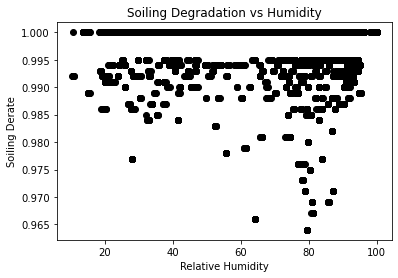

In [4]:
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

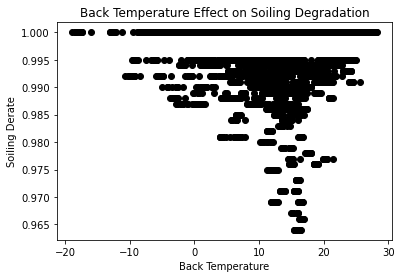

In [5]:
plt.scatter(df3["PV module back surface temperature (degC)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

Text(0.5, 1.0, 'Soiling Degradation vs POA Irradiance')

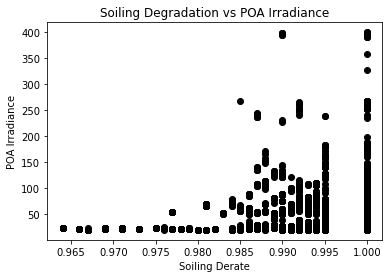

In [6]:
plt.scatter(df3["PV module soiling derate"], df3["POA irradiance CMP22 pyranometer (W/m2)"], color="black") 
plt.xlabel("Soiling Derate"); plt.ylabel("POA Irradiance")
plt.title("Soiling Degradation vs POA Irradiance")

count    11286.000000
mean      -901.523755
std       2980.774222
min      -9999.000000
25%         51.100000
50%         82.000000
75%         89.700000
max        100.000000
Name: Relative humidity (%RH), dtype: float64
count    10188.000000
mean        74.999058
std         21.237882
min         10.300000
25%         68.875000
50%         83.800000
75%         90.200000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


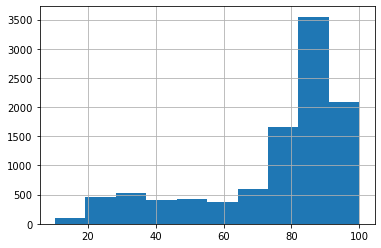

In [7]:
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64
count    10188.000000
mean        12.600481
std          7.817854
min        -18.900000
25%          7.000000
50%         12.800000
75%         18.600000
max         28.200000
Name: PV module back surface temperature (degC), dtype: float64


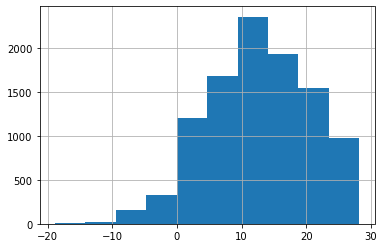

In [8]:
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64
count    10188.000000
mean         0.997753
std          0.004877
min          0.964000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


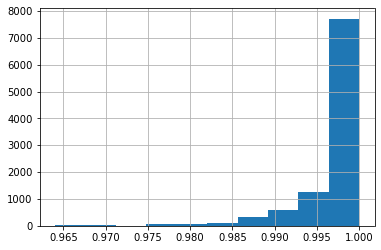

In [9]:
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
count    10188.000000
mean        41.554250
std         36.304042
min         20.000000
25%         22.500000
50%         25.900000
75%         53.500000
max        399.700000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64


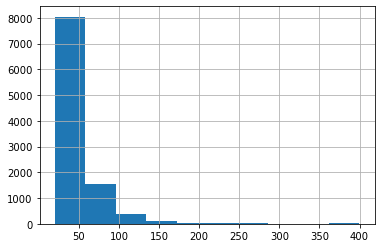

In [10]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()

In [11]:
# create basic regression model
x_vars = ["Relative humidity (%RH)", "PV module back surface temperature (degC)"]
y_var = ["PV module soiling derate"]
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df3.loc[:, x_vars], df3.loc[:, y_var])

# predictions
pred = simple_reg.predict(df3.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df3.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 2.3375938699608897e-05
coefficients [[ 3.04336785e-05 -2.23806953e-05]]
